<a href="https://colab.research.google.com/github/allanstar-byte/FINANCIAL-SERVICES/blob/main/CORE_IP_WEEK_2_ALLAN_MUTISYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINANCIAL SERVICES**

---







Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

# **1. Defining the question**

## **(i). Specifying The Question**

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.

## **(ii). Metric Of Success**

To be able to Come up with an insight the can demonstrate clearly on the individuals who will take bank accounts with a high accuracy percentage of predictability.

## **(iii). Experimental Design**

The experiment will be carried out on several bases.That is,Data wrangling, Univariate and Bivariate Analysis(Exploratory Data Analysis, Dimentionality reduction

## **(iv). Data relevance**

The given dataset can be used to drive some coclusions concerning the reseach question


# **2. Reading The Data**

In [1]:
#importing the libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#installing factor analyzer
!pip install factor_analyzer==0.2.3

In [3]:
#importing the dataset
df = pd.read_csv('/content/Financial Dataset - 1.csv')

# **3. Checking the Data**

In [4]:
# Determining the no. of records in our dataset
#
df.shape

(23524, 13)

In [5]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Previewing the bottom of our dataset
# 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


# **4. Tidying the Dataset**

In [8]:
#1. Checking for Outliers 

df.kurt()

year              165.195071
household_size      1.158154
Respondent Age      0.101108
dtype: float64

In [9]:
#removing the outliers using the interquartile range method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.kurt()

year             -1.595157
household_size   -0.499304
Respondent Age   -0.236345
dtype: float64

In [10]:
#2. Checking for Anomalies
#duplicates
df1.duplicated().sum()

0

In [11]:
#3. Identifying the Missing Data
#
df1.isna().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [12]:
#dropping the null values
df2 = df1.dropna()
df2.isna().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [226]:
#renaming column
df3 = df2.rename(columns={'Has a Bank account': 'Has_a_Bank_account', 'Type of Location': 'Type_of_Location', 
                          'Cell Phone Access': 'Cell_Phone_Access', 'Respondent Age': 'Respondent_Age', 
                          'The relathip with head': 'The_relathip_with_head', 'Level of Educuation': 'Level_of_Educuation',
                          'Type of Job': 'Type_of_Job'})
df3.head(3)

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relathip_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


# **6. Exploratory Analysis**

## **a) Univariate analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


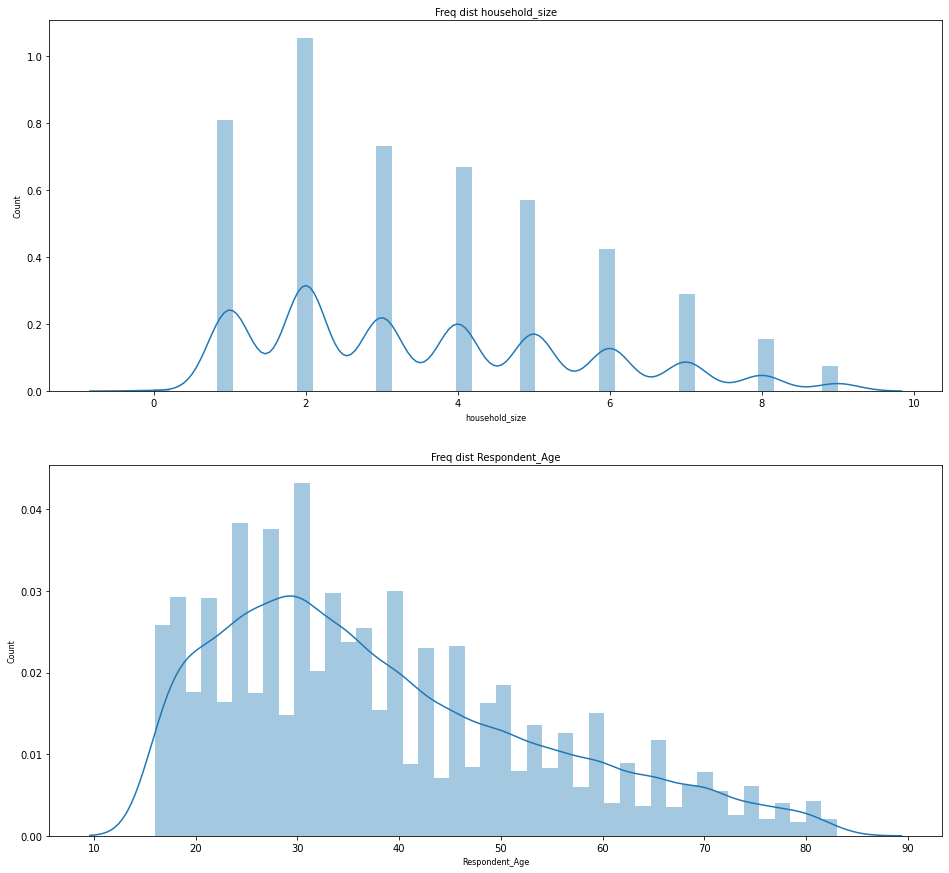

In [ ]:
# Ploting the univariate summaries for the household size and respondent age
#
col_names = ['household_size', 'Respondent_Age']

fig, ax = plt.subplots(len(col_names), figsize=(16,15))

for i, col_val in enumerate(col_names):

    sns.distplot(df3[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)


In [233]:
df3['Respondent_Age'].skew()
#the age dataset is exhibiting a positive skewness

0.7402138281724044

The observations from the univariate analysis are: most of the home sizes according to the dataset given ranges between 1 to 6. Secondly, according to the dataset given most of the people are of young and ages between 18 to 50 years with a high cluster on 18 to 40 ages

In [234]:
#average household size for the countries
df3['household_size'].mean()

3.57984598459846

In [235]:
#the mode of the age 
df3['Respondent_Age'].mode()


0    30.0
dtype: float64

## b) Bivariate analysis

In [ ]:
#grouping the by years
df4 = df3.groupby('year').sum()
#reseting the index
df5 = df4.reset_index()
df5

,year,household_size,Respondent_Age
0,2016,37723.0,331257.0
1,2017,12363.0,243825.0
2,2018,31266.0,296376.0


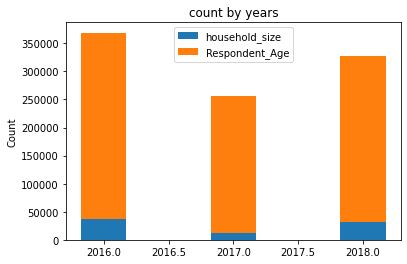

In [ ]:
#plotting a stacked plot for the household_size and Respondent_Age to the distribution over the years
labels = df5['year']
household_size = df5['household_size']
Respondent_Age = df5['Respondent_Age']

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, household_size, width, label='household_size')
ax.bar(labels, Respondent_Age, width, bottom=household_size,
       label='Respondent_Age')

ax.set_ylabel('Count')
ax.set_title('count by years')
ax.legend()

plt.show()

The house hold sizes hve remained almost the same over the years thus, there is no significant increase or decrease.This also applies to the respondents age distributions 

# **7. Multivariate Analysis**

In [163]:
#obtaining dummies for the coluns'country', 'Has_a_Bank_account','Type_of_Location', 'Cell_Phone_Access',
#'gender_of_respondent', 'The_relathip_with_head', 'marital_status', 'Level_of_Educuation',
#'Type_of_Job'
dummies = pd.get_dummies(df3[['Type_of_Location', 'Cell_Phone_Access',
                         'gender_of_respondent', 'The_relathip_with_head', 'marital_status', 'Level_of_Educuation',
                         'Type_of_Job']])
df4 = pd.concat([df3, dummies], axis='columns')

df5 = df4.drop(['Type_of_Location', 'Cell_Phone_Access',
                 'gender_of_respondent', 'The_relathip_with_head', 'marital_status', 'Level_of_Educuation',
                 'Type_of_Job', 
                ], axis = 'columns')
df5.head()


,country,year,uniqueid,Has_a_Bank_account,household_size,Respondent_Age,Type_of_Location_Rural,Type_of_Location_Urban,Cell_Phone_Access_No,Cell_Phone_Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,The_relathip_with_head_Child,The_relathip_with_head_Head of Household,The_relathip_with_head_Other non-relatives,The_relathip_with_head_Other relative,The_relathip_with_head_Parent,The_relathip_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level_of_Educuation_6,Level_of_Educuation_No formal education,Level_of_Educuation_Other/Dont know/RTA,Level_of_Educuation_Primary education,Level_of_Educuation_Secondary education,Level_of_Educuation_Tertiary education,Level_of_Educuation_Vocational/Specialised training,Type_of_Job_Dont Know/Refuse to answer,Type_of_Job_Farming and Fishing,Type_of_Job_Formally employed Government,Type_of_Job_Formally employed Private,Type_of_Job_Government Dependent,Type_of_Job_Informally employed,Type_of_Job_No Income,Type_of_Job_Other Income,Type_of_Job_Remittance Dependent,Type_of_Job_Self employed
0,Kenya,2018,uniqueid_1,Yes,3.0,24.0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,uniqueid_2,No,5.0,70.0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,uniqueid_3,Yes,5.0,26.0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,uniqueid_4,No,5.0,34.0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,uniqueid_5,No,8.0,26.0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


## **a) Principal Component Analysis**

In [165]:
#Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
x = df5.drop(['year', 'uniqueid', 'country', 'Has_a_Bank_account'], axis='columns')
y = df5[['Has_a_Bank_account']]

In [166]:
#Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [167]:
 #Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [168]:
#Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [169]:
#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance


array([9.09318562e-02, 8.29116141e-02, 7.54160249e-02, 5.62786237e-02,
       5.29273108e-02, 4.26902946e-02, 4.18329005e-02, 3.67829364e-02,
       3.36102369e-02, 3.12596411e-02, 3.00093920e-02, 2.96237873e-02,
       2.86210791e-02, 2.82093202e-02, 2.81727129e-02, 2.79978889e-02,
       2.77374282e-02, 2.75396270e-02, 2.71195798e-02, 2.70525226e-02,
       2.61949273e-02, 2.53874338e-02, 2.37737655e-02, 2.19067292e-02,
       2.07974261e-02, 1.77175224e-02, 1.43690516e-02, 1.28578676e-02,
       1.02704996e-02, 1.79331466e-32, 3.94814242e-33, 2.85357332e-33,
       2.00605526e-33, 9.90762676e-34, 6.86038001e-34, 3.49904620e-34])

In [170]:
#Using 4  Principal Component since using one component gives asn accuracy of 85% while using all 
#components as well as 2, 4 components they give an accuracy of 86%
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [171]:
#Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [172]:
classifier.score(x_test, y_test)

0.8684268426842684

In [176]:
#Performance Evaluation
# 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3878   18]
 [ 580   69]]
              precision    recall  f1-score   support

          No       0.87      1.00      0.93      3896
         Yes       0.79      0.11      0.19       649

    accuracy                           0.87      4545
   macro avg       0.83      0.55      0.56      4545
weighted avg       0.86      0.87      0.82      4545

Accuracy 0.8684268426842684


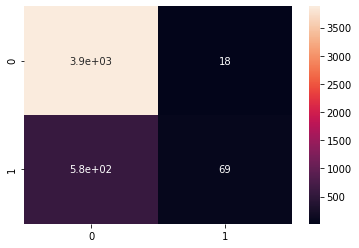

In [174]:
#plotting a headmap to analyze the performance of the model
sns.heatmap(cm, annot=True)

From the above experimentation we achieved optimal level of accuracy while significantly reducing the number of features in the dataset. We saw that accuracy achieved with only 4 principal component is equal to the accuracy achieved with will feature set i.e. 86%. From the results we can see that the accuracy achieved with 4 principal component (86.33%) was equivalent to the accuracy achieved by all principal components (83.33%).

## **b) Factor analysis**

In [115]:
df6 = df5.drop(['country', 'year', 'uniqueid'], axis=1)

In [123]:
#Adequacy Test
#  Bartlett’s Test
# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df5)
chi_square_value, p_value


(6345758.317221468, 0.0)

In [136]:

# Creating factor analysis object and perform factor analysis
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(df5, 25, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev.head()


,Original_Eigenvalues
0,3.412401
1,3.261611
2,2.801872
3,2.403598
4,1.991033


In [229]:
#Performing Factor Analysis
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(df6, 5, rotation="varimax")
fa.loadings.head()

,Factor1,Factor2,Factor3,Factor4,Factor5
household_size,0.095194,0.411328,-0.023106,-0.255255,-0.059305
Respondent_Age,-0.110937,-0.000433,-0.018524,0.539722,-0.458561
Has_a_Bank_account_No,0.081946,0.032142,-0.891566,0.002565,0.080216
Has_a_Bank_account_Yes,-0.081946,-0.032142,0.891566,-0.002565,-0.080216
Type_of_Location_Rural,0.003038,0.883929,-0.129385,0.071496,-0.067502


In [230]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.684115,2.493274,2.436805,1.952175,1.949395
Proportion Var,0.070635,0.065612,0.064126,0.051373,0.051300
Cumulative Var,0.070635,0.136247,0.200374,0.251747,0.303046


the household size has the hidhest factor loading

# **8. Implementing the solution**

which individuals are most likely to have or use a bank account

In [207]:
bank_account = df3.loc[df3['Has_a_Bank_account'] == 'Yes']
bank_account.head()

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relathip_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,uniqueid_12,Yes,Rural,Yes,3.0,69.0,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,uniqueid_18,Yes,Rural,Yes,6.0,27.0,Female,Head of Household,Married/Living together,Secondary education,Self employed


<BarContainer object of 22725 artists>

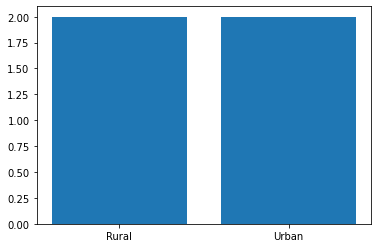

In [227]:
#identifying the location with the most people with bank account
df3['Has_a_Bank_account'] = df3['Has_a_Bank_account'].replace({'Yes': '1', 'No': '2'})
df3['Has_a_Bank_account'] = df3['Has_a_Bank_account'].apply(pd.to_numeric)
plt.bar(df3.Type_of_Location, df3.Has_a_Bank_account)

<BarContainer object of 22725 artists>

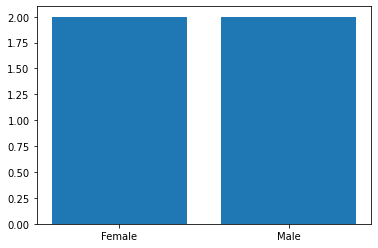

In [231]:
##identifying the gender with the most people with bank account
plt.bar(df3.gender_of_respondent, df3.Has_a_Bank_account)

In [228]:
#identifying which type of job has the highest number of the household size
dd1 = bank_account.groupby('Type_of_Job').sum()
dd1.reset_index()
dd1.sort_values(by = 'household_size', ascending=False)

,year,household_size,Respondent_Age
Type_of_Job,,,
Self employed,1684445,2716.0,31938.0
Farming and Fishing,1250526,2689.0,28545.0
Informally employed,883445,1564.0,16079.0
Formally employed Private,1137808,1508.0,19681.0
Formally employed Government,599178,1064.0,11593.0
Remittance Dependent,463970,777.0,8283.0
Other Income,369129,688.0,7619.0
Government Dependent,82709,98.0,2675.0
Dont Know/Refuse to answer,28236,53.0,520.0


# **9.Recommendation**

According to our dataset which comprises of most young people between the ages of 18 to 50, the focus on decision making should target the youth who are eager to to invest, since the self employed job type has the highest number of households for the young generation.Thus it will be fibancially prudent for the banks to focus on the young generation which is self employed so as to have a higher return on investment. The targeted group should also hace access to cell phones, since the people with cell phones seem to be the most with the bank accounts.The location and gender of the people is not playing a major role in influencing the rate at which people get bank accounts

# **10. challenging the solution**

The dataset could have included the population per age so as to work with the rate of the respondents contribution rather than a sumation since, the data collected seems to have focused ore on the young people thus causing biasnes in deriving the end results.Thus, making the recommendations weaker due to the biasness of the data in hand